In [4]:
from GA import solve
from TSP import compute_distance_matrix, visualize
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

file_path = '../data/5_CentralRegion.csv'

In [6]:
locations = pd.read_csv(file_path, header=None).values
locations


array([['province', 'lat', 'lon'],
       ['Thanh Hóa', '19.9781573', '105.4816107'],
       ['Nghệ An', '19.1976001', '105.0606760'],
       ['Hà Tĩnh', '18.3504832', '105.7623047'],
       ['Quảng Bình', '17.5095990', '106.4004452'],
       ['Quảng Trị', '16.7897806', '106.9797431'],
       ['Thừa Thiên Huế', '16.4639321', '107.5863388'],
       ['Quảng Nam', '15.5761698', '108.0527132'],
       ['Quảng Ngãi', '14.9953739', '108.6917290'],
       ['Bình Định', '14.0779378', '108.9898798'],
       ['Phú Yên', '13.1912633', '109.1273678'],
       ['Khánh Hòa', '12.2980751', '108.9950386'],
       ['Ninh Thuận', '11.6965639', '108.8928476'],
       ['Bình Thuận', '11.1041572', '108.1832931'],
       ['Kon Tum', '14.6995372', '107.9323831'],
       ['Gia Lai', '13.8177445', '108.2004015'],
       ['Đắk Lắk', '12.8292274', '108.2999058'],
       ['Đắk Nông', '12.2818851', '107.7302484'],
       ['Lâm Đồng', '11.6614957', '108.1335279'],
       ['Đà Nẵng', '16.0680000', '108.2120000']], dt

In [7]:
locations_numeric = locations[1:, 1:].astype(float)

distance_matrix = compute_distance_matrix(locations_numeric)

In [8]:

best_distance, best_route, fitness_history = solve(
    distance_matrix,
    population_size=100,
    generations=200,
    mutation_rate=0.01,
    mutation_algorithm='inversion',
    crossover_algorithm='order',
    selection_algorithm='tournament'
)


In [22]:

# In kết quả
print("Best route:", best_route)
print("Total distance (km):", best_distance)


Best route: [1, 2, 3, 4, 5, 6, 19, 14, 15, 11, 12, 18, 13, 17, 16, 10, 9, 8, 7, 1]
Total distance (km): 2433.014468661054


In [10]:
# ===== BOX 1: THÊM VÀO SAU PHẦN "Ảnh hưởng của Population size" =====
# Thêm phân tích Solution Quality và Convergence Speed
def analyze_performance(fitness_data, labels, title):
    """Phân tích chất lượng lời giải và tốc độ hội tụ"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Solution Quality (Best Final Distance)
    final_distances = [fitness[-1] for fitness in fitness_data]
    bars1 = ax1.bar(labels, final_distances, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax1.set_ylabel('Best Distance (km)')
    ax1.set_title(f'Solution Quality - {title}')
    ax1.grid(True, alpha=0.3)
    
    # Thêm giá trị lên cột
    for bar, val in zip(bars1, final_distances):
        ax1.text(bar.get_x() + bar.get_width()/2, val, f'{val:.1f}', 
                ha='center', va='bottom')
    
    # Convergence Speed (Generation to reach 95% of final improvement)
    convergence_speeds = []
    for fitness in fitness_data:
        initial = fitness[0]
        final = fitness[-1]
        target = initial - 0.95 * (initial - final)
        
        conv_gen = len(fitness) - 1  # Default to last generation
        for i, f in enumerate(fitness):
            if f <= target:
                conv_gen = i
                break
        convergence_speeds.append(conv_gen)
    
    bars2 = ax2.bar(labels, convergence_speeds, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax2.set_ylabel('Convergence Generation')
    ax2.set_title(f'Convergence Speed - {title}')
    ax2.grid(True, alpha=0.3)
    
    # Thêm giá trị lên cột
    for bar, val in zip(bars2, convergence_speeds):
        ax2.text(bar.get_x() + bar.get_width()/2, val, f'{val}', 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

### Ảnh hưởng của Population size

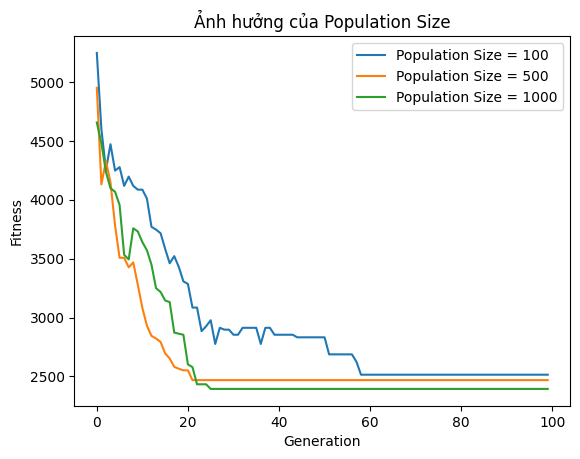

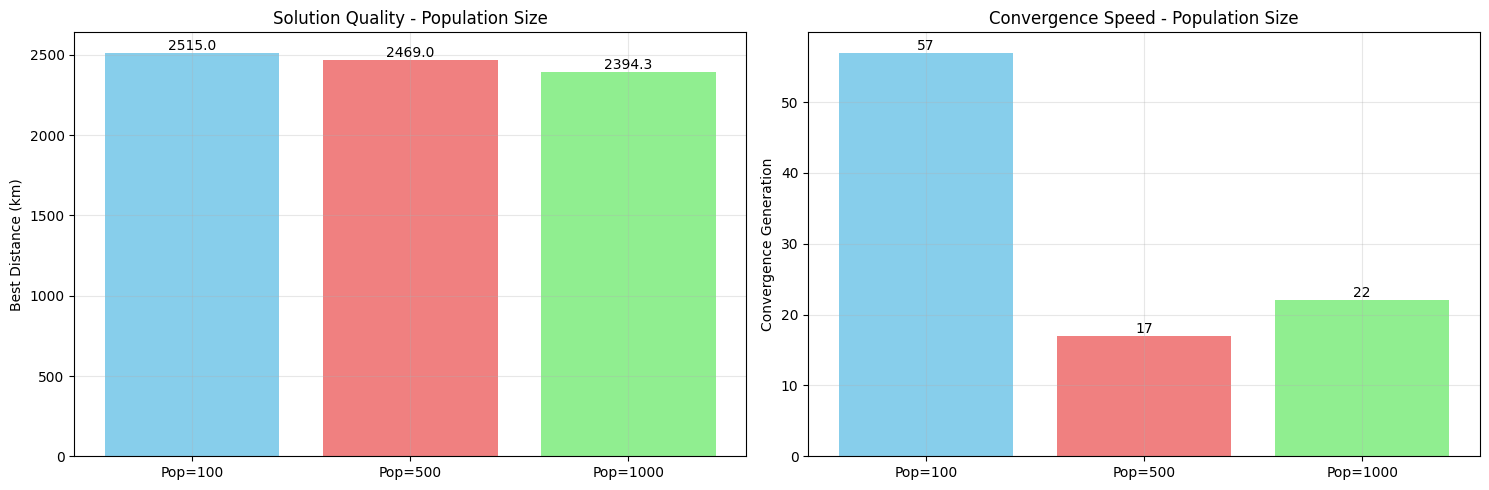

In [11]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=500)[2]
fitness3 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=1000)[2]

plt.plot(fitness1, label='Population Size = 100')
plt.plot(fitness2, label='Population Size = 500')
plt.plot(fitness3, label='Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Population Size")
plt.legend()
plt.show()
analyze_performance([fitness1, fitness2, fitness3], 
                   ['Pop=100', 'Pop=500', 'Pop=1000'], 
                   'Population Size')

### Đánh giá kết quả:

## Ảnh hưởng của mutation_rate

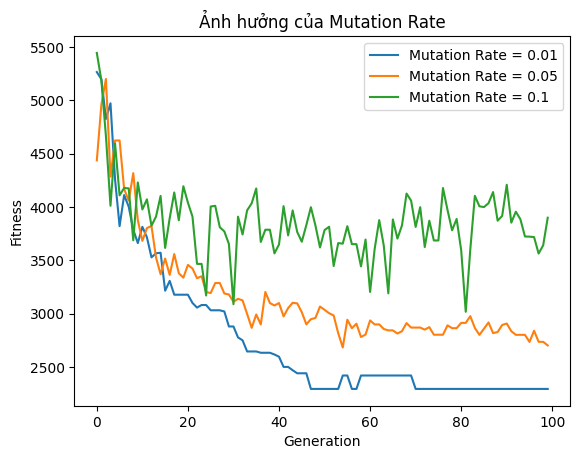

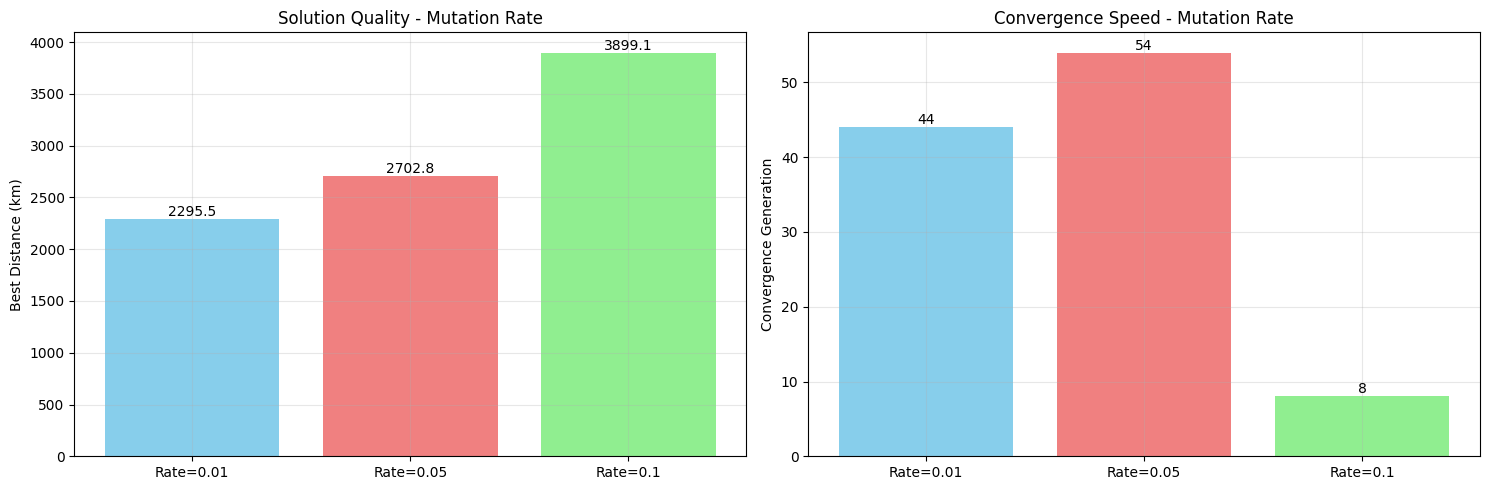

In [19]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness4 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=100)[2]
fitness5 = solve(distance_matrix, generations=100, mutation_rate=0.1, population_size=100)[2]

plt.plot(fitness1, label='Mutation Rate = 0.01')
plt.plot(fitness4, label='Mutation Rate = 0.05')
plt.plot(fitness5, label='Mutation Rate = 0.1')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Mutation Rate")
plt.legend()
plt.show()
analyze_performance([fitness1, fitness4, fitness5], 
                   ['Rate=0.01', 'Rate=0.05', 'Rate=0.1'], 
                   'Mutation Rate')

## Ảnh hưởng của generations

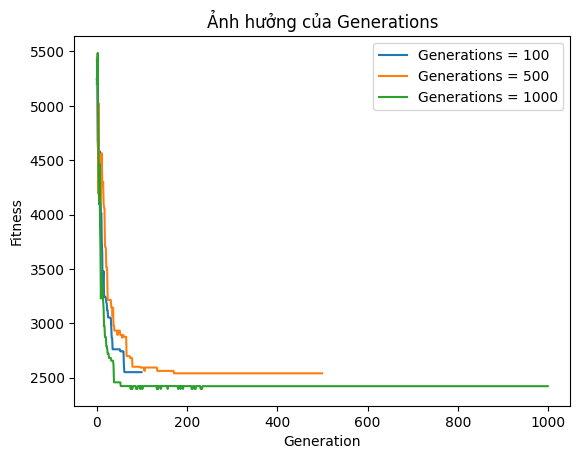

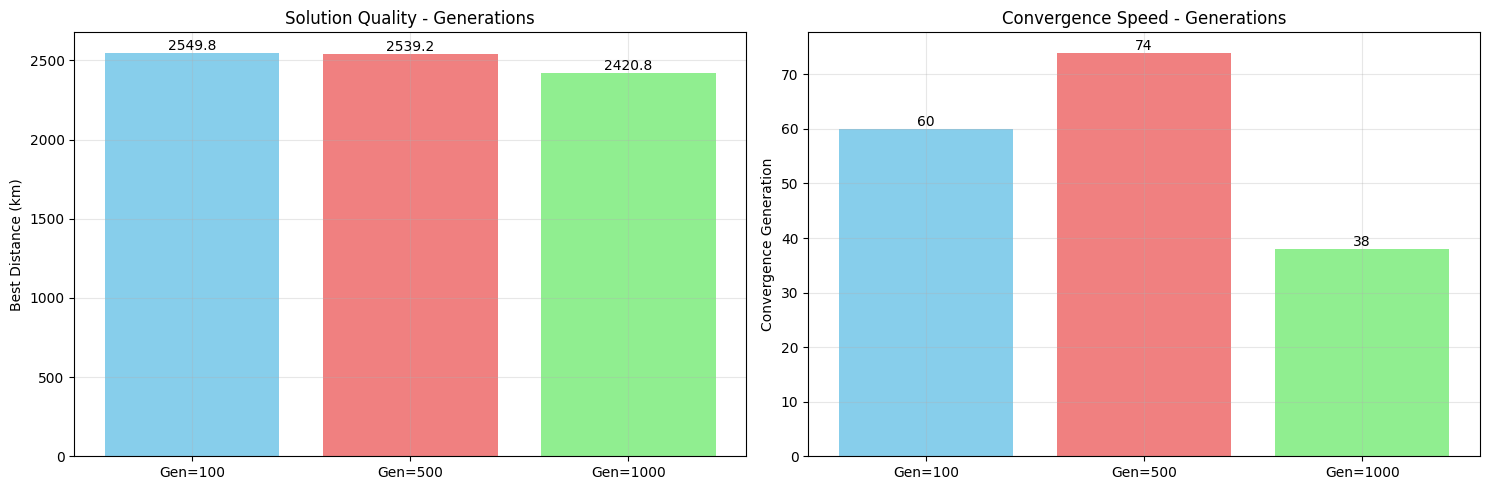

In [21]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=500, mutation_rate=0.01, population_size=100)[2]
fitness3 = solve(distance_matrix, generations=1000, mutation_rate=0.01, population_size=100)[2]

plt.plot(fitness1, label='Generations = 100')
plt.plot(fitness2, label='Generations = 500')
plt.plot(fitness3, label='Generations = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Generations")
plt.legend()
plt.show()
analyze_performance([fitness1, fitness2, fitness3], 
                   ['Gen=100', 'Gen=500', 'Gen=1000'], 
                   'Generations')

### Đánh giá kết quả:

## Tăng đồng thời mutation_rate và population_size

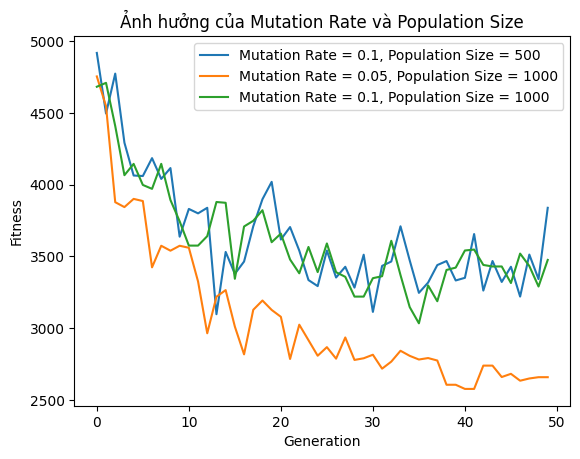

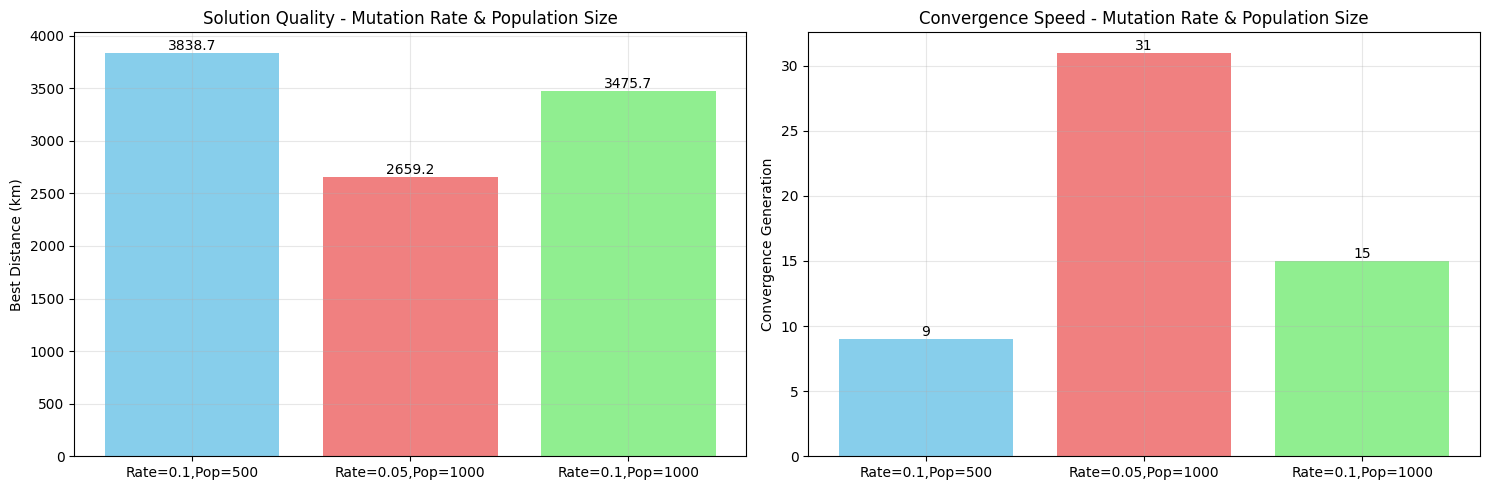

In [20]:
fitness1 = solve(distance_matrix, generations=50, mutation_rate=0.1, population_size=500)[2]
fitness2 = solve(distance_matrix, generations=50, mutation_rate=0.05, population_size=1000)[2]
fitness3 = solve(distance_matrix, generations=50, mutation_rate=0.1, population_size=1000)[2]

plt.plot(fitness1, label='Mutation Rate = 0.1, Population Size = 500')
plt.plot(fitness2, label='Mutation Rate = 0.05, Population Size = 1000')
plt.plot(fitness3, label='Mutation Rate = 0.1, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Mutation Rate và Population Size")
plt.legend()
plt.show()
analyze_performance([fitness1, fitness2, fitness3], 
                   ['Rate=0.1,Pop=500', 'Rate=0.05,Pop=1000', 'Rate=0.1,Pop=1000'], 
                   'Mutation Rate & Population Size')

### Đánh giá kết quả:

## Tăng đồng thời mutation_rate và generations

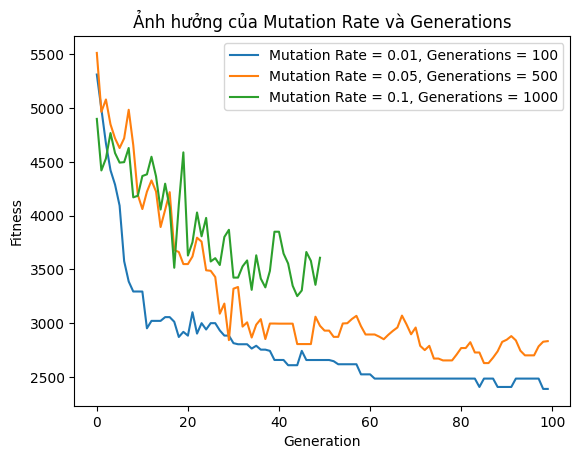

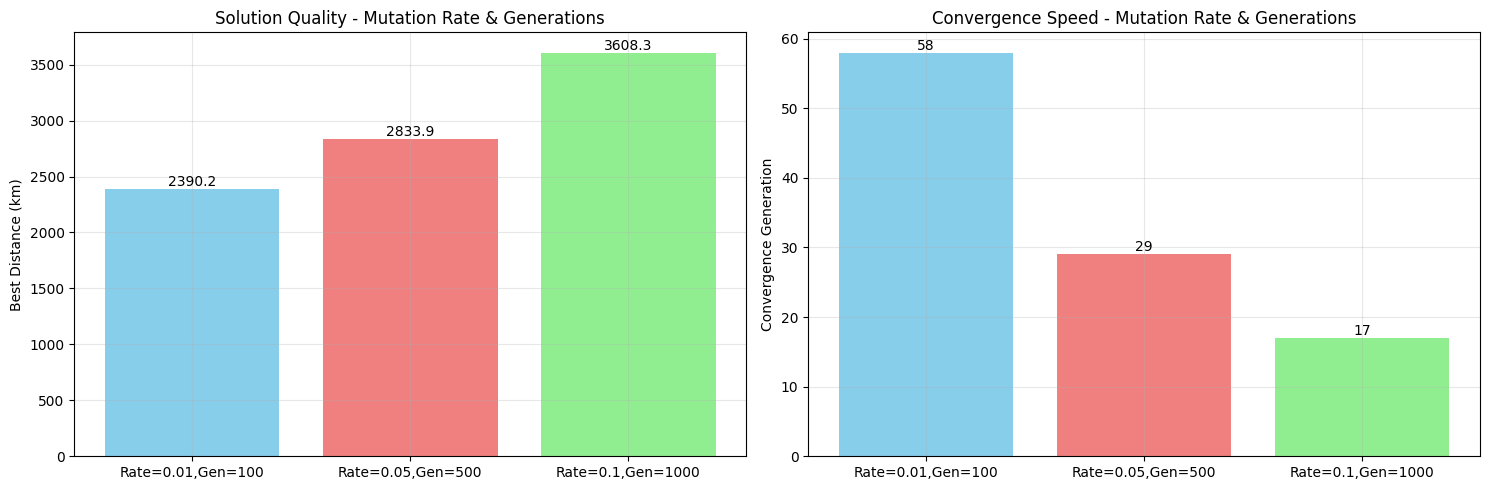

In [17]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=100)[2]
fitness3 = solve(distance_matrix, generations=50, mutation_rate=0.1, population_size=100)[2]
plt.plot(fitness1, label='Mutation Rate = 0.01, Generations = 100')
plt.plot(fitness2, label='Mutation Rate = 0.05, Generations = 500')
plt.plot(fitness3, label='Mutation Rate = 0.1, Generations = 1000') 
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Mutation Rate và Generations")
plt.legend()
plt.show()
analyze_performance([fitness1, fitness2, fitness3], 
                   ['Rate=0.01,Gen=100', 'Rate=0.05,Gen=500', 'Rate=0.1,Gen=1000'], 
                   'Mutation Rate & Generations')

### Đánh giá kết quả:

## Tăng đồng thời generations và population_size

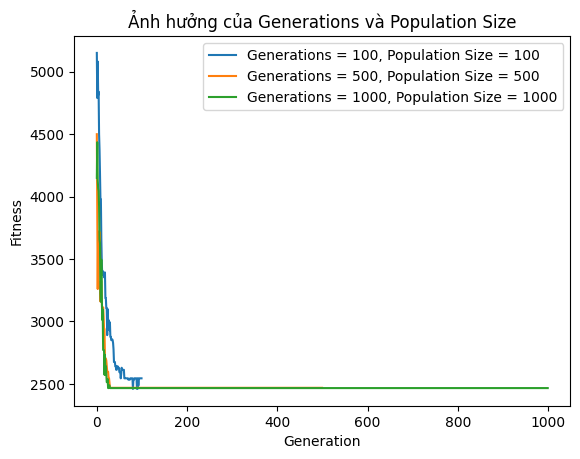

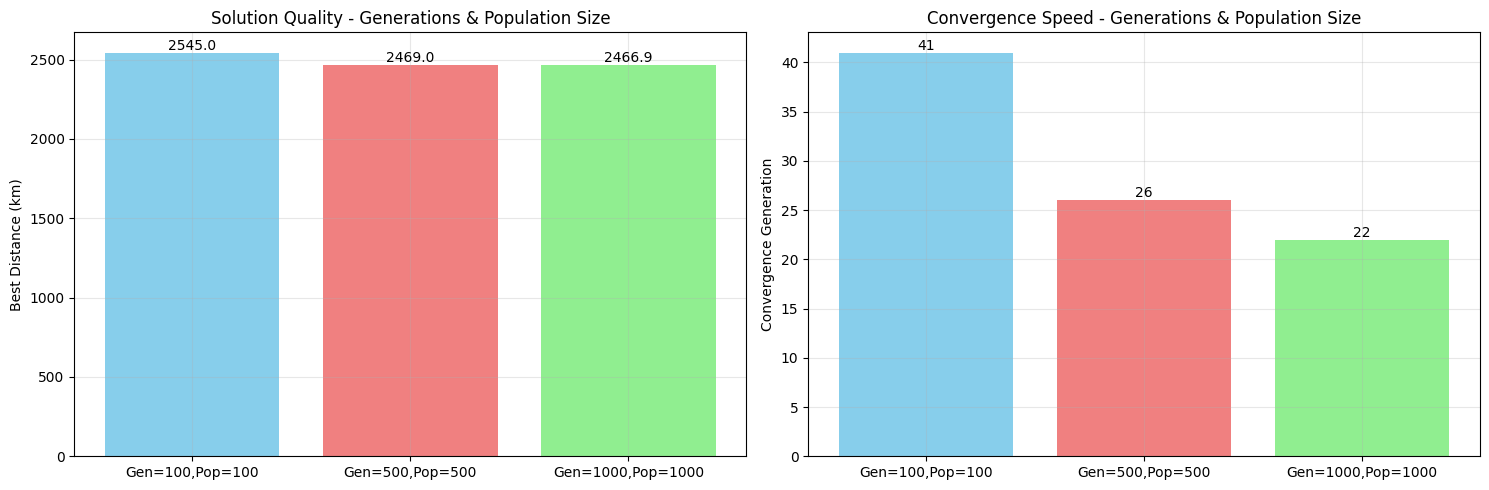

In [18]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=500, mutation_rate=0.01, population_size=500)[2]
fitness3 = solve(distance_matrix, generations=1000, mutation_rate=0.01, population_size=1000)[2]
plt.plot(fitness1, label='Generations = 100, Population Size = 100')
plt.plot(fitness2, label='Generations = 500, Population Size = 500')
plt.plot(fitness3, label='Generations = 1000, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Generations và Population Size")
plt.legend()
plt.show()
analyze_performance([fitness1, fitness2, fitness3], 
                   ['Gen=100,Pop=100', 'Gen=500,Pop=500', 'Gen=1000,Pop=1000'], 
                   'Generations & Population Size')

### Đánh giá kết quả:

## KẾT LUẬN